# 株価予測

- [Pythonで将来予測｜株価データを使ってpythonで機械学習をしてみよう【データ加工、データ整形、予測モデル作成、株価データの分類予測、予測精度の確認まで】](https://www.youtube.com/watch?v=asfWaVpCyl8&t=1250s)
- [機械学習で株価予測（TA-LibとLightGBMを使った学習モデル構築）](https://nehori.com/nikki/2020/01/26/post-15231/)
- [超簡単Pythonで株価予測（LightGBM 利用）機械学習](https://note.com/10mohi6/n/n4b1196fea816)
- [超簡単Pythonで株価予測（Optuna・LightGBM 利用）ハイパーパラメータ自動最適化](https://note.com/10mohi6/n/n46d1bb0267b7)
- [年利30%超え！！！！！LightGBMを用いたトヨタ株自動売買シミュレーション](https://qiita.com/kt38k/items/3c0ee4251475b6407007)
- [lightgbm.plot_importance](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.plot_importance.html)

In [1]:
# 銘柄コード
MEIGARA_CODE = '9983.T'

In [2]:
# pandasのインポート
import pandas as pd

In [3]:
# データの読み込み
df = pd.read_csv('%s_wFeatures.csv' %MEIGARA_CODE)
# データフレームの表示
df

,Date,weeks,weekday,High,Low,Open,Close,Volume,delta_Close,Up,...,lower1,upper2,lower2,upper3,lower3,macd,macdsignal,macdhist,rsi9,rsi14
0,2010-01-04,2348,0,17660.0,17410.0,17660.0,17460.0,373600.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,2348,1,17290.0,16800.0,17210.0,16900.0,1002600.0,-560.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-06,2348,2,17000.0,16730.0,16960.0,16770.0,669800.0,-130.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-07,2348,3,16950.0,16400.0,16780.0,16690.0,581900.0,-80.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-08,2348,4,16950.0,16190.0,16780.0,16900.0,1891700.0,210.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,2021-12-24,2972,4,68410.0,67510.0,67750.0,67540.0,224500.0,-660.0,0.0,...,66754.594698,73714.010604,64434.789396,76033.815907,62114.984093,-1278.921872,-1499.570426,220.648554,42.801640,42.027297
2952,2021-12-27,2973,0,67530.0,66260.0,67480.0,66360.0,352600.0,-1180.0,0.0,...,66608.572426,73116.855149,64439.144851,75286.282723,62269.717277,-1330.690354,-1465.794412,135.104058,36.976001,38.456259
2953,2021-12-28,2973,1,66950.0,66100.0,66770.0,66140.0,349200.0,-220.0,0.0,...,66524.527382,72327.345236,64590.254764,74261.617853,62655.982147,-1373.635001,-1447.362530,73.727529,35.949707,37.811186
2954,2021-12-29,2973,2,66580.0,65010.0,66580.0,65670.0,412000.0,-470.0,0.0,...,66385.713028,71738.573945,64601.426055,73522.860917,62817.139083,-1429.120009,-1443.714025,14.594017,33.701537,36.406185


In [4]:
# 各カラムの詳細確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2956 non-null   object 
 1   weeks        2956 non-null   int64  
 2   weekday      2956 non-null   int64  
 3   High         2956 non-null   float64
 4   Low          2956 non-null   float64
 5   Open         2956 non-null   float64
 6   Close        2956 non-null   float64
 7   Volume       2956 non-null   float64
 8   delta_Close  2955 non-null   float64
 9   Up           2956 non-null   float64
 10  Close_ratio  2955 non-null   float64
 11  Body         2956 non-null   float64
 12  Force_Index  2956 non-null   float64
 13  sma3         2954 non-null   float64
 14  sma5         2952 non-null   float64
 15  sma25        2932 non-null   float64
 16  sma50        2907 non-null   float64
 17  sma75        2882 non-null   float64
 18  sma100       2857 non-null   float64
 19  upper1

In [5]:
# Dateのデータ型を'datetime'型へ変更
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2956 non-null   datetime64[ns]
 1   weeks        2956 non-null   int64         
 2   weekday      2956 non-null   int64         
 3   High         2956 non-null   float64       
 4   Low          2956 non-null   float64       
 5   Open         2956 non-null   float64       
 6   Close        2956 non-null   float64       
 7   Volume       2956 non-null   float64       
 8   delta_Close  2955 non-null   float64       
 9   Up           2956 non-null   float64       
 10  Close_ratio  2955 non-null   float64       
 11  Body         2956 non-null   float64       
 12  Force_Index  2956 non-null   float64       
 13  sma3         2954 non-null   float64       
 14  sma5         2952 non-null   float64       
 15  sma25        2932 non-null   float64       
 16  sma50 

In [6]:
# 日付をインデックスにセット
df.set_index(keys='Date', inplace=True)
df

,weeks,weekday,High,Low,Open,Close,Volume,delta_Close,Up,Close_ratio,...,lower1,upper2,lower2,upper3,lower3,macd,macdsignal,macdhist,rsi9,rsi14
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,2348,0,17660.0,17410.0,17660.0,17460.0,373600.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,2348,1,17290.0,16800.0,17210.0,16900.0,1002600.0,-560.0,0.0,-0.032073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,2348,2,17000.0,16730.0,16960.0,16770.0,669800.0,-130.0,0.0,-0.007692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,2348,3,16950.0,16400.0,16780.0,16690.0,581900.0,-80.0,1.0,-0.004770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,2348,4,16950.0,16190.0,16780.0,16900.0,1891700.0,210.0,0.0,0.012582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,2972,4,68410.0,67510.0,67750.0,67540.0,224500.0,-660.0,0.0,-0.009677,...,66754.594698,73714.010604,64434.789396,76033.815907,62114.984093,-1278.921872,-1499.570426,220.648554,42.801640,42.027297
2021-12-27,2973,0,67530.0,66260.0,67480.0,66360.0,352600.0,-1180.0,0.0,-0.017471,...,66608.572426,73116.855149,64439.144851,75286.282723,62269.717277,-1330.690354,-1465.794412,135.104058,36.976001,38.456259
2021-12-28,2973,1,66950.0,66100.0,66770.0,66140.0,349200.0,-220.0,0.0,-0.003315,...,66524.527382,72327.345236,64590.254764,74261.617853,62655.982147,-1373.635001,-1447.362530,73.727529,35.949707,37.811186


# 不要なデータを削除する

In [7]:
# 不要カラムの削除と並べ替え
df = df[['weekday',
         #'High', 'Low', 'Open', 'Close',
         'Close_ratio', 'Body', 'Force_Index',
         'sma3', 'sma5', 'sma25', 'sma50', 'sma75', 'sma100',
         'upper1', 'lower1', 'upper2', 'lower2', 'upper3', 'lower3',
         'macd', 'macdsignal', 'macdhist',
         'rsi9','rsi14',
         'Up']]
df.dropna()
df

,weekday,Close_ratio,Body,Force_Index,sma3,sma5,sma25,sma50,sma75,sma100,...,upper2,lower2,upper3,lower3,macd,macdsignal,macdhist,rsi9,rsi14,Up
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0,NaN,200.0,6.523056e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2010-01-05,1,-0.032073,310.0,1.694394e+10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2010-01-06,2,-0.007692,190.0,1.123255e+10,17043.333333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2010-01-07,3,-0.004770,90.0,9.711911e+09,16786.666667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2010-01-08,4,0.012582,-120.0,3.196973e+10,16786.666667,16944.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,4,-0.009677,210.0,1.516273e+10,68013.333333,67790.0,69074.4,72226.8,73364.000000,73419.8,...,73714.010604,64434.789396,76033.815907,62114.984093,-1278.921872,-1499.570426,220.648554,42.801640,42.027297,0.0
2021-12-27,0,-0.017471,1120.0,2.339854e+10,67366.666667,67750.0,68778.0,72096.6,73236.133333,73345.5,...,73116.855149,64439.144851,75286.282723,62269.717277,-1330.690354,-1465.794412,135.104058,36.976001,38.456259,0.0
2021-12-28,1,-0.003315,630.0,2.309609e+10,66680.000000,67308.0,68458.8,71963.8,73106.133333,73275.6,...,72327.345236,64590.254764,74261.617853,62655.982147,-1373.635001,-1447.362530,73.727529,35.949707,37.811186,0.0


# 学習データと検証データに分割する

In [8]:
# 学習データを2018-01-01～2020-12-31の期間とし、df_trainに入力する
df_train = df['2018-01-01':'2020-12-31']
df_train

,weekday,Close_ratio,Body,Force_Index,sma3,sma5,sma25,sma50,sma75,sma100,...,upper2,lower2,upper3,lower3,macd,macdsignal,macdhist,rsi9,rsi14,Up
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,0,0.000000,0.0,0.000000e+00,44936.666667,44956.0,44258.8,41674.0,39318.933333,37347.8,...,46190.674282,42326.925718,47156.611422,41360.988578,960.524339,1160.522293,-199.997954,57.819800,61.586844,0.0
2018-01-02,1,0.000000,0.0,0.000000e+00,44910.000000,45018.0,44389.2,41830.8,39480.400000,37470.6,...,46014.942120,42763.457880,46827.813180,41950.586820,902.434077,1108.904650,-206.470573,57.819800,61.586844,0.0
2018-01-03,2,0.000000,0.0,0.000000e+00,44910.000000,44926.0,44493.6,41994.6,39638.800000,37597.6,...,45888.044750,43099.155250,46585.267125,42401.932875,846.637615,1056.451243,-209.813628,57.819800,61.586844,1.0
2018-01-04,3,0.034068,-860.0,4.634248e+10,45420.000000,45216.0,44610.8,42180.4,39815.733333,37740.9,...,46140.797856,43080.802144,46905.796784,42315.803216,915.325428,1028.226080,-112.900652,74.820290,71.357178,1.0
2018-01-05,4,0.008613,-110.0,3.424472e+10,46063.333333,45602.0,44738.0,42359.8,39999.200000,37895.8,...,46448.737853,43027.262147,47304.106779,42171.893221,990.618439,1020.704552,-30.086112,77.488821,73.271262,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,3,0.018975,-1040.0,3.124910e+10,84886.666667,84630.0,84818.8,80374.2,75691.733333,72016.1,...,87748.675465,81888.924535,89213.613197,80423.986803,1094.310813,1528.618156,-434.307344,61.767794,61.178946,1.0
2020-12-25,4,0.004655,-390.0,1.786824e+10,85520.000000,84982.0,84941.6,80707.6,75965.200000,72300.3,...,87855.471267,82027.728733,89312.406900,80570.793100,1138.300861,1450.554697,-312.253837,64.201500,62.581820,1.0
2020-12-28,0,0.006719,-430.0,3.479476e+10,86380.000000,85576.0,85172.4,81037.2,76242.933333,72608.8,...,87734.956723,82609.843277,89016.235085,81328.564915,1206.061714,1401.656101,-195.594386,67.569085,64.580514,1.0


In [9]:
# 検証データを2021-01-01以降とし、df_valに入力する
df_val = df['2021-01-01':]
df_val

,weekday,Close_ratio,Body,Force_Index,sma3,sma5,sma25,sma50,sma75,sma100,...,upper2,lower2,upper3,lower3,macd,macdsignal,macdhist,rsi9,rsi14,Up
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,0,-0.015356,2920.0,5.937370e+10,91443.333333,89510.0,86134.8,82125.6,77231.466667,73599.3,...,90660.630293,81608.969707,92923.545439,79346.054561,2117.177944,1651.969998,465.207946,72.619582,70.057776,0.0
2021-01-05,1,-0.020648,930.0,5.001545e+10,90896.666667,90080.0,86336.4,82467.2,77524.666667,73902.9,...,90935.474272,81737.325728,93235.011408,79437.788592,2076.261786,1736.828356,339.433430,60.263378,61.739314,0.0
2021-01-06,2,-0.024784,1680.0,5.497611e+10,89060.000000,90092.0,86377.2,82758.8,77802.933333,74182.2,...,90979.580323,81774.819677,93280.770485,79473.629515,1844.247567,1758.312198,85.935369,49.193850,53.671603,1.0
2021-01-07,3,0.015984,-400.0,6.114704e+10,88160.000000,89600.0,86408.8,83072.6,78102.133333,74469.4,...,91053.881080,81763.718920,93376.421620,79441.178380,1752.336170,1757.116992,-4.780822,55.037702,57.438730,1.0
2021-01-08,4,0.038257,-2110.0,8.875795e+10,89013.333333,89452.0,86590.4,83434.2,78451.733333,74785.6,...,91677.407702,81503.392298,94220.911553,78959.888447,1929.985803,1791.690754,138.295048,65.799216,64.910548,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,4,-0.009677,210.0,1.516273e+10,68013.333333,67790.0,69074.4,72226.8,73364.000000,73419.8,...,73714.010604,64434.789396,76033.815907,62114.984093,-1278.921872,-1499.570426,220.648554,42.801640,42.027297,0.0
2021-12-27,0,-0.017471,1120.0,2.339854e+10,67366.666667,67750.0,68778.0,72096.6,73236.133333,73345.5,...,73116.855149,64439.144851,75286.282723,62269.717277,-1330.690354,-1465.794412,135.104058,36.976001,38.456259,0.0
2021-12-28,1,-0.003315,630.0,2.309609e+10,66680.000000,67308.0,68458.8,71963.8,73106.133333,73275.6,...,72327.345236,64590.254764,74261.617853,62655.982147,-1373.635001,-1447.362530,73.727529,35.949707,37.811186,0.0


In [10]:
# 学習データを説明変数（X_train）と目的変数（y_train）に分ける
X_train = df_train[['weekday',
         #'High', 'Low', 'Open', 'Close',
         'Close_ratio', 'Body', 'Force_Index',
         'sma3', 'sma5', 'sma25', 'sma50', 'sma75', 'sma100',
         'upper1', 'lower1', 'upper2', 'lower2', 'upper3', 'lower3',
         'macd', 'macdsignal', 'macdhist',
         'rsi9','rsi14']]
y_train = df_train[['Up']]

# 学習データの説明変数と目的変数を確認
print(X_train)
print(y_train)

            weekday  Close_ratio    Body   Force_Index          sma3     sma5  \
Date                                                                            
2018-01-01        0     0.000000     0.0  0.000000e+00  44936.666667  44956.0   
2018-01-02        1     0.000000     0.0  0.000000e+00  44910.000000  45018.0   
2018-01-03        2     0.000000     0.0  0.000000e+00  44910.000000  44926.0   
2018-01-04        3     0.034068  -860.0  4.634248e+10  45420.000000  45216.0   
2018-01-05        4     0.008613  -110.0  3.424472e+10  46063.333333  45602.0   
...             ...          ...     ...           ...           ...      ...   
2020-12-24        3     0.018975 -1040.0  3.124910e+10  84886.666667  84630.0   
2020-12-25        4     0.004655  -390.0  1.786824e+10  85520.000000  84982.0   
2020-12-28        0     0.006719  -430.0  3.479476e+10  86380.000000  85576.0   
2020-12-29        1     0.044994 -3580.0  7.540862e+10  88010.000000  86854.0   
2020-12-30        2     0.01

In [11]:
# 検証データを説明変数（X_valid）と目的変数（y_valid）に分ける
X_valid = df_val[['weekday',
         #'High', 'Low', 'Open', 'Close',
         'Close_ratio', 'Body', 'Force_Index',
         'sma3', 'sma5', 'sma25', 'sma50', 'sma75', 'sma100',
         'upper1', 'lower1', 'upper2', 'lower2', 'upper3', 'lower3',
         'macd', 'macdsignal', 'macdhist',
         'rsi9','rsi14']]
y_valid = df_val[['Up']]

# 検証データの説明変数と目的変数を確認
print(X_valid)
print(y_valid)

            weekday  Close_ratio    Body   Force_Index          sma3     sma5  \
Date                                                                            
2021-01-04        0    -0.015356  2920.0  5.937370e+10  91443.333333  89510.0   
2021-01-05        1    -0.020648   930.0  5.001545e+10  90896.666667  90080.0   
2021-01-06        2    -0.024784  1680.0  5.497611e+10  89060.000000  90092.0   
2021-01-07        3     0.015984  -400.0  6.114704e+10  88160.000000  89600.0   
2021-01-08        4     0.038257 -2110.0  8.875795e+10  89013.333333  89452.0   
...             ...          ...     ...           ...           ...      ...   
2021-12-24        4    -0.009677   210.0  1.516273e+10  68013.333333  67790.0   
2021-12-27        0    -0.017471  1120.0  2.339854e+10  67366.666667  67750.0   
2021-12-28        1    -0.003315   630.0  2.309609e+10  66680.000000  67308.0   
2021-12-29        2    -0.007106   910.0  2.705604e+10  66056.666667  66782.0   
2021-12-30        3    -0.00

In [12]:
# matplotlibのインポート
from matplotlib import pyplot as plt
%matplotlib inline

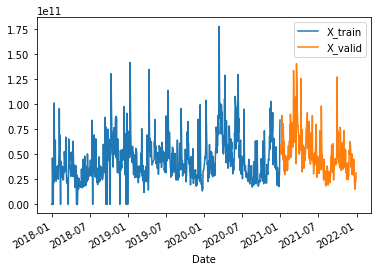

In [13]:
# 学習データと検証データの勢力指数（Force_Index）の折れ線グラフ作成
X_train['Force_Index'].plot(kind='line')
X_valid['Force_Index'].plot(kind='line')

# グラフの凡例を設定
plt.legend(['X_train', 'X_valid'])

# グラフの表示
plt.show()

# 予測モデルを作成する

In [14]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, precision_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import optuna

# ログを非表示にしたいときは、optuna.logging.disable_default_handler()
# 逆に、表示にしたいときは、optuna.logging.enable_default_handler()
optuna.logging.disable_default_handler()

In [15]:
def objective(trial):
    dtrain = lgb.Dataset(X_train, label=y_train)
    param = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    gbm = lgb.train(param, dtrain)
    preds = gbm.predict(X_valid)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_valid, pred_labels)
    return accuracy

In [16]:
def autotuning(seed=31):
    #tuner = optuna.create_study(direction="maximize")
    # "sampler"オプションで乱数シードを指定
    tuner = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=seed))
    tuner.optimize(objective, n_trials=100)

    clf = lgb.LGBMRegressor(**dict(tuner.best_trial.params.items()))
    clf.fit(
        X_train,
        y_train,
    )

    y_pred = clf.predict(X_valid)
    print('accuracy_score: %s' %accuracy_score(y_valid, y_pred > 0.5))
    print('f1_score      : %s' %f1_score(y_valid, y_pred > 0.5, average='macro'))
    # Tupleとして戻り値に
    return (seed, accuracy_score(y_valid, y_pred > 0.5), f1_score(y_valid, y_pred > 0.5, average='macro'), tuner.best_trial.params.items())

In [17]:
import math

# 乱数シードを指定（from 素数を取得するワンライナー）
seeds = (lambda n:[x for x in range(2, n) if not 0 in map(lambda z: x%z, range(2, x))])(200)

In [18]:
# 各試行での情報を保存
result = []

for seed in seeds:
    print('### seed:%s ###' %seed)
    result.append(autotuning(seed))

### seed:2 ###
[LightGBM] [Warning] lambda_l1 is set=0.0005522470168113717, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005522470168113717
[LightGBM] [Warning] feature_fraction is set=0.980878111981327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.980878111981327
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=3.2739384025330984e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.2739384025330984e-07
[LightGBM] [Warning] bagging_fraction is set=0.5507035221476905, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5507035221476905
accuracy_score: 0.5959183673469388
f1_score      : 0.5945945945945945
### seed:3 ###
[LightGBM] [Warning] lambda_l1 is set=1.0253798982529451e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0253798982529451e-05
[LightGBM] [Warning] feature_fraction is set=0.7956112009965144, colsam

In [19]:
result_acc = [x[1] for x in result]
print('max: %s' %max(result_acc))
print('min: %s' %min(result_acc))
print('ave: %s' %(sum(result_acc) / len(result_acc)))

max: 0.6
min: 0.49387755102040815
ave: 0.5535048802129549


In [20]:
# accracy_score値で降順にソート
result = sorted(result[:], key=lambda x: x[1], reverse=True)
result[0]

(67,
 0.6,
 0.5787719298245614,
 dict_items([('lambda_l1', 2.2941800390458785e-05), ('lambda_l2', 0.06967340192569912), ('num_leaves', 13), ('feature_fraction', 0.7983380118574861), ('bagging_fraction', 0.6584846647743906), ('bagging_freq', 5), ('min_child_samples', 82)]))

In [21]:
def mybest(tunedparam):
    clf = lgb.LGBMRegressor(**dict(tunedparam))
    clf.fit(
        X_train,
        y_train,
    )

    y_pred = clf.predict(X_valid)
    print('accuracy_score: %s' %accuracy_score(y_valid, y_pred > 0.5))
    print('f1_score      : %s' %f1_score(y_valid, y_pred > 0.5, average='macro'))
    return (clf, y_pred)

In [22]:
# 最もaccracy_score値の高かった試行でのハイパーパラメータを使って改めてモデルを構築
clf, y_pred = mybest(result[0][3])

[LightGBM] [Warning] lambda_l1 is set=2.2941800390458785e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2941800390458785e-05
[LightGBM] [Warning] feature_fraction is set=0.7983380118574861, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7983380118574861
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.06967340192569912, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06967340192569912
[LightGBM] [Warning] bagging_fraction is set=0.6584846647743906, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6584846647743906
accuracy_score: 0.6
f1_score      : 0.5787719298245614


# 予測精度を確認する

AUC 0.5591636412531935


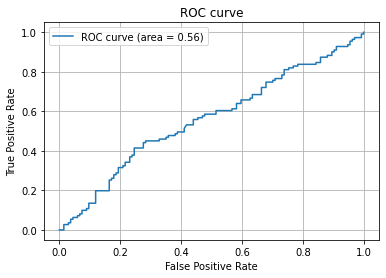

accuracy 0.6
precision 0.5822784810126582


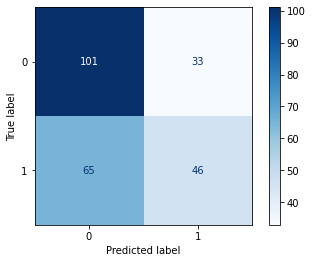

In [23]:
# AUCを計算
fpr, tpr, thresholds = roc_curve(np.asarray(y_valid), y_pred)
auc = auc(fpr, tpr)
print("AUC", auc)

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

# accuracy, precisionを計算
acc = accuracy_score(np.asarray(y_valid), np.round(y_pred))
precision = precision_score(np.asarray(y_valid), np.round(y_pred))
print("accuracy", acc)
print("precision", precision)

# 混同行列をプロット
y_pred = np.round(y_pred)
cm = confusion_matrix(np.asarray(y_valid), np.where(y_pred < 0.5, 0, 1))
cmp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
cmp.plot(cmap=plt.cm.Blues)
plt.show()

# 特徴量重要度を図示する

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

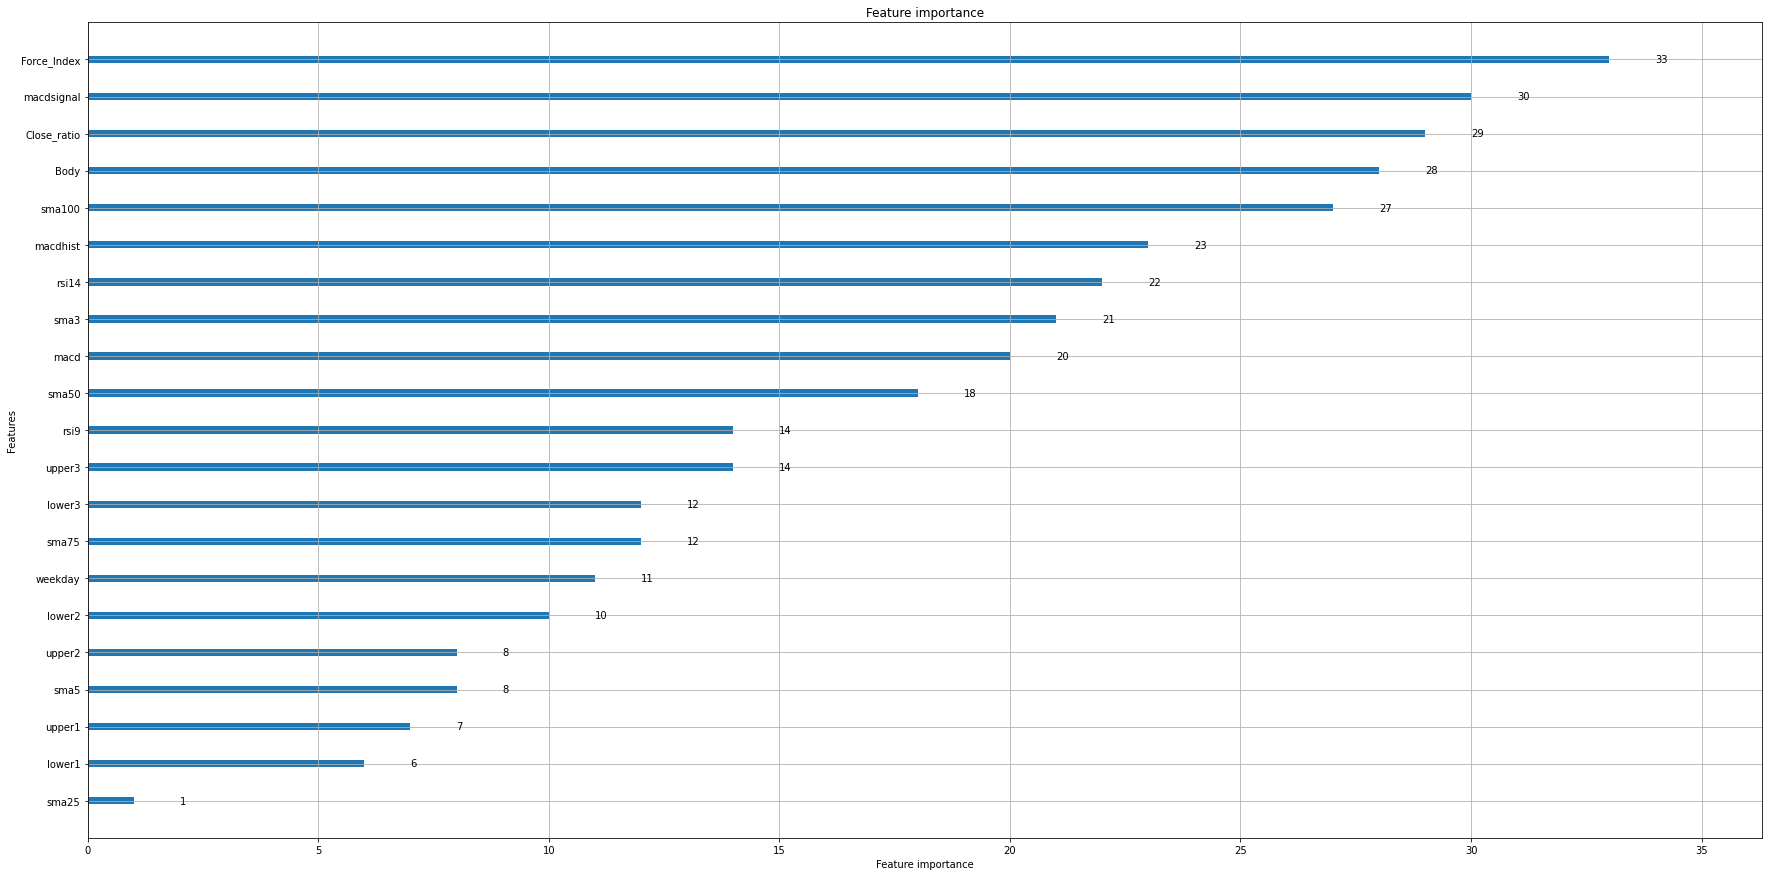

In [24]:
# 重要度としては「特徴量が分岐（ノード）の条件式で使用された回数」（＝デフォルト）
lgb.plot_importance(clf, figsize=(30, 15), max_num_features=30, importance_type='split')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

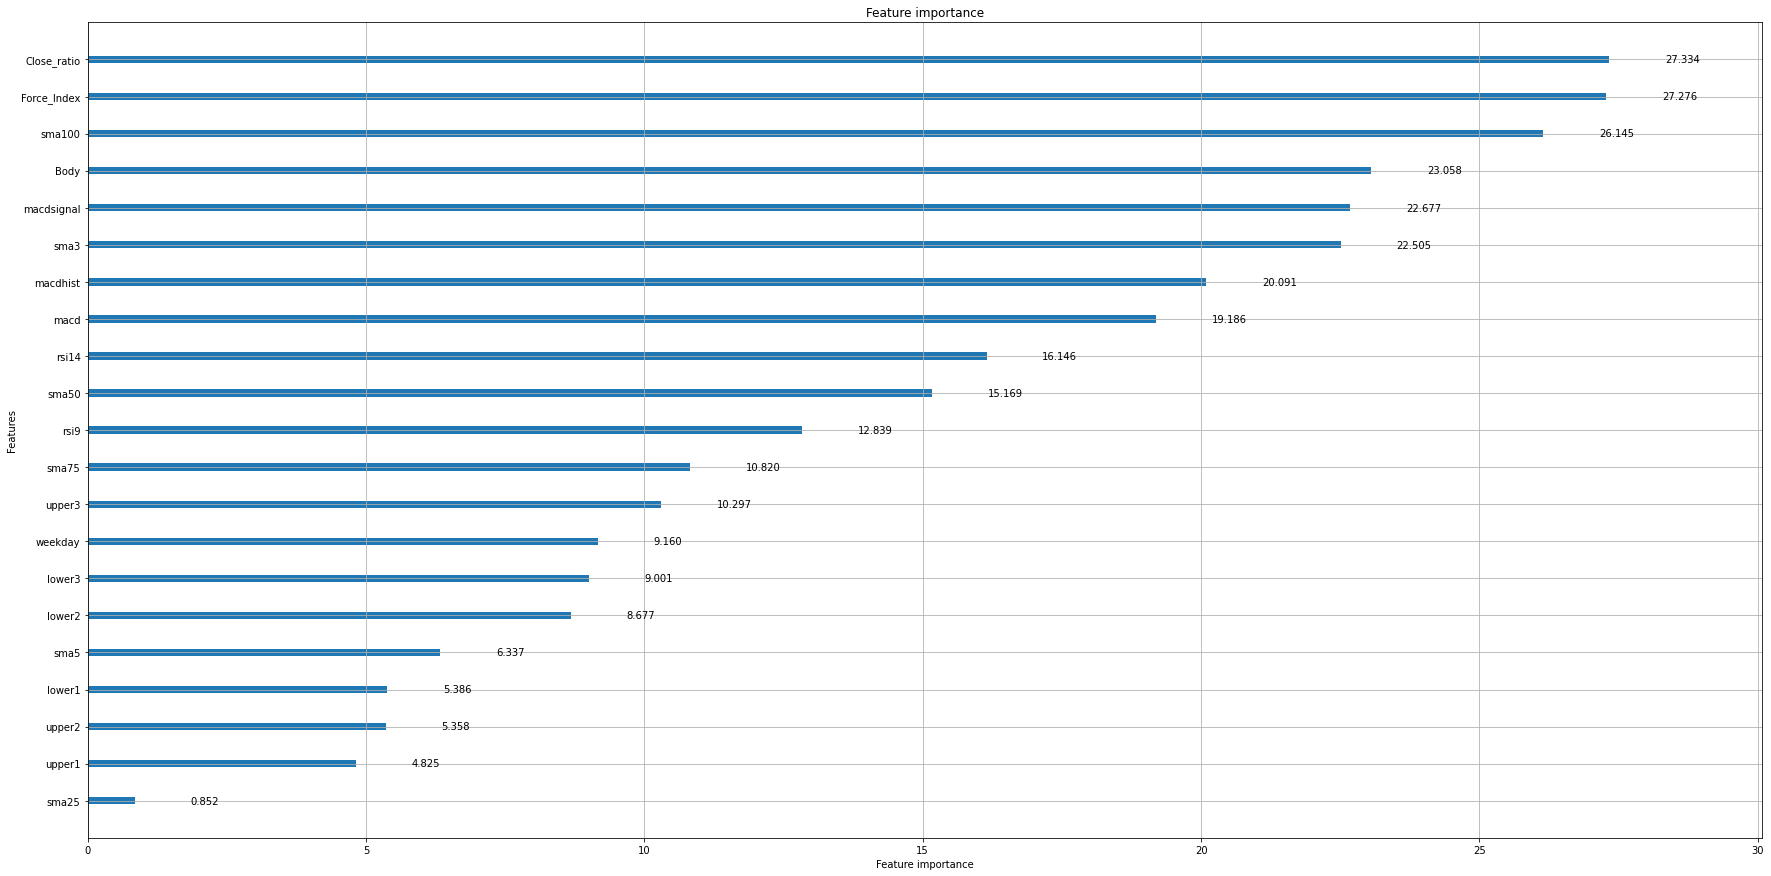

In [25]:
# 重要度としては「特徴量がある分岐（ノード）において目的関数の改善に寄与した度合い」
lgb.plot_importance(clf, figsize=(30, 15), max_num_features=30, importance_type='gain')